## Assignment #1

* Release date: 2021.09.28 Tue
* Due date: **2021.10.05 Tue 23:59** (will not accept late submission)
* Submission format: notebook file which can be executed in Colab environment
* Weighting: 5% (total 50 pts)

1. **(10pts)** Calculate `rotation*x` and `x*rotation`. Explain how each computation is performed and why two results are the same.

  ```python
    import numpy as np

    x = np.array([[2, 0]])
    rotation = np.array([ [0, -1],
                          [1,  0] ])
  ```

In [1]:
import numpy as np

x = np.array([[2, 0]])
rotation = np.array([ [0, -1],
                       [1,  0] ])

print('x*rotation is')
print( x * rotation)
print()
print('rotation*x is')
print(rotation * x)

x*rotation is
[[0 0]
 [2 0]]

rotation*x is
[[0 0]
 [2 0]]


Broadcating is a function that automatically supports operations between different shape of arrays.
The conditions under which broadcasting can occur are as follows.
<br/>
1.   It is possible when the dimension size is 1. </br>
In an operation between two arrays, if the dimension of at least one array is 1, it is possible (whether it is axis 0 or axis 1; row 1 or column 1).
<br/>
2.   It's possible when the dimensions match. <br/>
Broadcasting is possible if the lengths of the axes are the same for the dimensions.

That is, the matrix X automatically broadcasts for the asterisk operation and changes as follows.

 ```python
    x = np.array([[2, 0]]) -> x = np.array([[2,0],
                                            [2,0]]) #By Broadcasting
  ```
Asterisk operation is an operator that multiplies two identical matrices by element-wise.
As a result, the operation proceeds as follows.
 ```python
    x * rotation = np.array([2*0, 0*-1],
                            [2*1, 0*0]])
  ```

Since the asterisk operator is element-wise, the law of exchange is established.

2. **(5pts)** Suppose we have the following 2D tensor (i.e., a matrix). How to rearrange its values into 1D tensor (i.e., a vector) in a column major order?
```python
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])
```

In [2]:
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])

x = x.flatten()
print('x\'s 1D tensor is :', x)
print('x\'s shape is :', x.shape)

x's 1D tensor is : [ 1  2  3  4  5  6  7  8  9 10 11 12]
x's shape is : (12,)


3. **(5pts)** Compute a transpose of the matrix `x` in Problem 2 by using only `np.reshape` function.

In [3]:
x = np.reshape(x,(3,4))
print('x\'s 2D tensor is :')
print(x)
print('x\'s shape is :', x.shape)

x's 2D tensor is :
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
x's shape is : (3, 4)


4. **(5pts)** Perform vector arithmetic to create a `primes_squared_minus_one` vector, where the `i`th element is equal to the `i`th element in `primes` squared minus 1. For example, the second element of `primes_squared_minus_one` would be equal to `3^2 - 1 = 8`. Note that using `for` loop is not allowed.
```python
import numpy as np
primes = np.array([2, 3, 5, 7, 11, 13])
primes_squared_minus_one = ?
```

In [4]:
import numpy as np
primes = np.array([2, 3, 5, 7, 11, 13])

def fun_primes_squared_minus_one(n):
    return n**2 -1

func = np.vectorize(fun_primes_squared_minus_one)

primes_squared_minus_one = func(primes)
print('Answer is ' ,primes_squared_minus_one)

Answer is  [  3   8  24  48 120 168]


5. **(10pts)** Given any random matrices, compute the element-wise multiplication using a naive Python implementation and Numpy built-in function respectively. Compare the wall-clock times of these implementations as the size of matrices increases.



In [5]:
import time
import numpy as np

matrix_shape_list = []
time_to_make_naive = []
time_to_make_numpy = []

def naive_hadamard_product(mat1, mat2):
    matrix_size_row = mat1.shape[0]
    matrix_size_col = mat1.shape[1]

    matrix_temp = np.zeros(shape=(matrix_size_row, matrix_size_col))

    for i in range(matrix_size_row):
      for j in range(matrix_size_col):
        matrix_temp[i][j] = mat1[i][j] * mat2[i][j]

    return matrix_temp

for i in range(15):
    matrix_shape_list.append(2**i)

for matrix_shape in matrix_shape_list:
    beg_time1 = time.time()
    
    matrix_temp1 = np.random.rand(matrix_shape, matrix_shape)
    matrix_temp2 = np.random.rand(matrix_shape, matrix_shape)
    matrix_temp_numpy = np.multiply(matrix_temp1,matrix_temp2)
    
    end_time1 = time.time()
    time_to_make_numpy.append(end_time1 - beg_time1)

    beg_time2 = time.time()
    
    matrix_temp_naive = naive_hadamard_product(matrix_temp1,matrix_temp2)
    
    end_time2 = time.time()
    time_to_make_naive.append(end_time2 - beg_time2)
    
time_to_make_naive

[1.1205673217773438e-05,
 7.152557373046875e-06,
 2.7418136596679688e-05,
 6.818771362304688e-05,
 0.0002491474151611328,
 0.0010037422180175781,
 0.005061149597167969,
 0.022311925888061523,
 0.07186317443847656,
 0.26901817321777344,
 1.0825231075286865,
 4.309640407562256,
 17.509987831115723,
 67.9693431854248,
 276.3217399120331]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


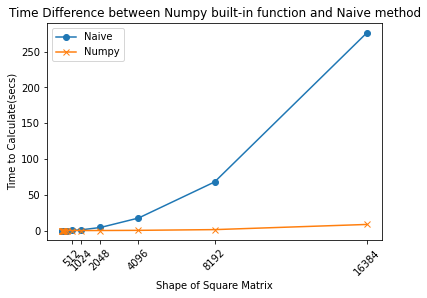

In [8]:
import matplotlib.pyplot as plt

plt.plot(matrix_shape_list, time_to_make_naive, marker = 'o')
plt.plot(matrix_shape_list, time_to_make_numpy, marker = 'x')

plt.title('Time Difference between Numpy built-in function and Naive method')
plt.xlabel('Shape of Square Matrix')
plt.ylabel('Time to Calculate(secs)')
plt.xticks(rotation=45)
plt.legend(['Naive', 'Numpy'])

ax = plt.subplot()
ax.set_xticks(matrix_shape_list[9:])


plt.show()

6. **(15pts)** Consider MNIST classification problem covered during the class. For the details, please refer to the course material. In this example, we used the multilayer perceptron composed of an input layer with 512 hidden nodes and an output layer that produces predicted probabilities over 10 classes. In the class, we used GPU as a hardware accelerator to train our model.

  Here, let's verify the actual benefit of using GPU for training. For this, compare the wall-clock times in the case of 1) using CPU and 2) using GPU to train MNIST classifier.


### **CPU ver**
<br/>
<br/>
## A first look at a neural network
  

* An example of a neural network to learn to classify handwritten digits
* We will use the MNIST dataset.
  * 28*28 grayscale images, 10 categories
  * 60,000 training images, 10,000 test images
  * Refer to http://yann.lecun.com/exdb/mnist/
  * Solving MNIST is like the "hello world" of deep learning
* Note
  * In ML, a category in a classification problem is called a *class*.
  * Data points are called *samples*.
  * The class associated with a specific sample is called a *label*, *target* or *ground truth*.
* First, let's look into the MNIST dataset.


```python
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
print(device)
print('16102284')
```

    cpu
    16102284
    


```python
import tensorflow as tf

tf.__version__
```




    '2.6.0'




```python
!nvidia-smi
```

    NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
    
    


```python
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

# API reference https://keras.io/datasets/#mnist-database-of-handwritten-digits
```

* The images are encoded as Numpy arrays, and the labels are an array of digits (0-9).
* The images and labels have a one-to-one correspondence.


```python
print(type(train_images))
```

    <class 'numpy.ndarray'>
    


```python
print('Shape of train_images array: ', train_images.shape)
print('# of training samples: ', len(train_images))

print('Shape of test_images array: ', test_images.shape)
print('# of test samples: ', len(test_images))
```

    Shape of train_images array:  (60000, 28, 28)
    # of training samples:  60000
    Shape of test_images array:  (10000, 28, 28)
    # of test samples:  10000
    


```python
train_images[10]
```




    array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
            219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
            254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
            254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
            254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
            254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
            206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
            137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
            254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
            254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
            254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
             89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
              0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
             89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
            254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
            254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
            254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0]], dtype=uint8)




```python
train_images[10].shape
```




    (28, 28)




```python
train_labels
```




    array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)




```python
train_labels.shape
```




    (60000,)




```python
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('default') # set the same default style as jupyter notebook

def visualize_mnist(image, label):
  plt.imshow(image, cm.binary)
  plt.title(label)
  plt.show()

visualize_mnist(train_images[1000], train_labels[1000])
```


    
![png](output_16_0.png)
    


* We'll feed the neural network the training data, `train_images` and `train_labels`.
* After training, we'll ask the network to produce predictions for `test_images`, and we'll verify whether these predictions match the labels from `test_labels`.
* Let's build the network.


```python
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
```

* As we learned, the core building block of neural networks is the *layers*, a data-processing module.
* Specifically, layers extract *representations* out of the data fed into them.
* We can obtain more useful representations as training goes.


* Here, our network consists of a sequence of two `Dense` layers, which are densely connected (also called `fully connected`) layers.
* The last layer is a 10-way `softmax` layer, which means it will return an array of 10 probability scores (summing to 1).


* To make the network ready for training, we need three more things,
  * A loss function
  * An optimizer
  * Metrics to monitor during training and testing


```python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```

* Before training, we'll preprocess the data: **reshaping, scaling**.
  * `(60000, 28, 28) uint8` in the `[0, 255]` --> `(60000, 28*28) float32` in the `[0,1]`


```python
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255
```

* We also need to categorically encode the labels, which is called *one-hot vector*.


```python
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```


```python
train_labels.shape
```




    (60000, 10)




```python
train_labels[10]
```




    array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)



* Now, we are ready to train the network by calling *fit* method of the network.


```python
import time

start = time.time()
network.fit(train_images, train_labels, epochs=5, batch_size=128)
elapsed = time.time() - start

print('Elapsed time: %.4f' % elapsed)
```

    Epoch 1/5
    469/469 [==============================] - 5s 10ms/step - loss: 0.2556 - accuracy: 0.9255
    Epoch 2/5
    469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9696
    Epoch 3/5
    469/469 [==============================] - 5s 10ms/step - loss: 0.0680 - accuracy: 0.9794
    Epoch 4/5
    469/469 [==============================] - 5s 10ms/step - loss: 0.0487 - accuracy: 0.9851
    Epoch 5/5
    469/469 [==============================] - 5s 10ms/step - loss: 0.0370 - accuracy: 0.9892
    Elapsed time: 23.7541
    

* Two quantities are displayed during training, *loss* and *accuracy*.
* Note that these quantities do not guarantee the *test* performance.
* Let's check that the model performs well on the test set, too.


```python
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
```

    313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9799
    test_acc:  0.9799000024795532
    

* The test accuracy is a bit lower than the training accuracy.
* This gap between training accuracy and test accuracy is an example of *overfitting*.


* We saw how we can build and train a neural network to classify handwritten digits in less than 20 lines of Python code.



### **GPU ver**
<br/>
<br/>
## A first look at a neural network
  

* An example of a neural network to learn to classify handwritten digits
* We will use the MNIST dataset.
  * 28*28 grayscale images, 10 categories
  * 60,000 training images, 10,000 test images
  * Refer to http://yann.lecun.com/exdb/mnist/
  * Solving MNIST is like the "hello world" of deep learning
* Note
  * In ML, a category in a classification problem is called a *class*.
  * Data points are called *samples*.
  * The class associated with a specific sample is called a *label*, *target* or *ground truth*.
* First, let's look into the MNIST dataset.


```python
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
print(device)
print('16102284')
```

    cuda
    16102284
    


```python
import tensorflow as tf

tf.__version__
```




    '2.6.0'




```python
!nvidia-smi
```

    Tue Sep 28 06:12:05 2021       
    +-----------------------------------------------------------------------------+
    | NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
    |-------------------------------+----------------------+----------------------+
    | GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
    | Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
    |                               |                      |               MIG M. |
    |===============================+======================+======================|
    |   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
    | N/A   71C    P8    34W / 149W |      3MiB / 11441MiB |      0%      Default |
    |                               |                      |                  N/A |
    +-------------------------------+----------------------+----------------------+
                                                                                   
    +-----------------------------------------------------------------------------+
    | Processes:                                                                  |
    |  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
    |        ID   ID                                                   Usage      |
    |=============================================================================|
    |  No running processes found                                                 |
    +-----------------------------------------------------------------------------+
    


```python
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

# API reference https://keras.io/datasets/#mnist-database-of-handwritten-digits
```

    Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
    11493376/11490434 [==============================] - 0s 0us/step
    11501568/11490434 [==============================] - 0s 0us/step
    

* The images are encoded as Numpy arrays, and the labels are an array of digits (0-9).
* The images and labels have a one-to-one correspondence.


```python
print(type(train_images))
```

    <class 'numpy.ndarray'>
    


```python
print('Shape of train_images array: ', train_images.shape)
print('# of training samples: ', len(train_images))

print('Shape of test_images array: ', test_images.shape)
print('# of test samples: ', len(test_images))
```

    Shape of train_images array:  (60000, 28, 28)
    # of training samples:  60000
    Shape of test_images array:  (10000, 28, 28)
    # of test samples:  10000
    


```python
train_images[10]
```




    array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
            219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
            254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254,
            254, 254, 254, 254, 238,  70,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 104, 244,
            254, 224, 254, 254, 254, 141,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207,
            254, 210, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,
            206, 254, 254, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
             24, 209, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91,
            137, 253, 254, 254, 254, 112,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 214, 250,
            254, 254, 254, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 247, 254,
            254, 254, 254, 254, 254, 146,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 246,
            254, 254, 254, 254, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
             89,  89,  93, 240, 254, 171,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   1, 128, 254, 219,  31,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   7, 254, 254, 214,  28,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0, 138, 254, 254, 116,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,  19, 177,  90,   0,   0,   0,   0,
              0,  25, 240, 254, 254,  34,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0, 164, 254, 215,  63,  36,   0,  51,
             89, 206, 254, 254, 139,   8,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,  57, 197, 254, 254, 222, 180, 241,
            254, 254, 253, 213,  11,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0, 140, 105, 254, 254, 254, 254,
            254, 254, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   7, 117, 117, 165, 254,
            254, 239,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0],
           [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
              0,   0]], dtype=uint8)




```python
train_images[10].shape
```




    (28, 28)




```python
train_labels
```




    array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)




```python
train_labels.shape
```




    (60000,)




```python
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('default') # set the same default style as jupyter notebook

def visualize_mnist(image, label):
  plt.imshow(image, cm.binary)
  plt.title(label)
  plt.show()

visualize_mnist(train_images[1000], train_labels[1000])
```


    
![png](output_16_0.png)
    


* We'll feed the neural network the training data, `train_images` and `train_labels`.
* After training, we'll ask the network to produce predictions for `test_images`, and we'll verify whether these predictions match the labels from `test_labels`.
* Let's build the network.


```python
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
```

* As we learned, the core building block of neural networks is the *layers*, a data-processing module.
* Specifically, layers extract *representations* out of the data fed into them.
* We can obtain more useful representations as training goes.


* Here, our network consists of a sequence of two `Dense` layers, which are densely connected (also called `fully connected`) layers.
* The last layer is a 10-way `softmax` layer, which means it will return an array of 10 probability scores (summing to 1).


* To make the network ready for training, we need three more things,
  * A loss function
  * An optimizer
  * Metrics to monitor during training and testing


```python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```

* Before training, we'll preprocess the data: **reshaping, scaling**.
  * `(60000, 28, 28) uint8` in the `[0, 255]` --> `(60000, 28*28) float32` in the `[0,1]`


```python
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255
```

* We also need to categorically encode the labels, which is called *one-hot vector*.


```python
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```


```python
train_labels.shape
```




    (60000, 10)




```python
train_labels[10]
```




    array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)



* Now, we are ready to train the network by calling *fit* method of the network.


```python
import time

start = time.time()
network.fit(train_images, train_labels, epochs=5, batch_size=128)
elapsed = time.time() - start

print('Elapsed time: %.4f' % elapsed)
```

    Epoch 1/5
    469/469 [==============================] - 5s 4ms/step - loss: 0.2572 - accuracy: 0.9260
    Epoch 2/5
    469/469 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9694
    Epoch 3/5
    469/469 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9799
    Epoch 4/5
    469/469 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9851
    Epoch 5/5
    469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9888
    Elapsed time: 12.8957
    

* Two quantities are displayed during training, *loss* and *accuracy*.
* Note that these quantities do not guarantee the *test* performance.
* Let's check that the model performs well on the test set, too.


```python
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
```

    313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9812
    test_acc:  0.9811999797821045
    

* The test accuracy is a bit lower than the training accuracy.
* This gap between training accuracy and test accuracy is an example of *overfitting*.


* We saw how we can build and train a neural network to classify handwritten digits in less than 20 lines of Python code.


As a result of the experiment, the time spent learning through the **CPU was 23.7541 sec**, and the time taken using the **GPU was 12.8957 sec**. Nearly half of the time has been **shortened through GPUs**, and if you learn a more complex deep learning model, these performance differences will be even more significant.